In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import time

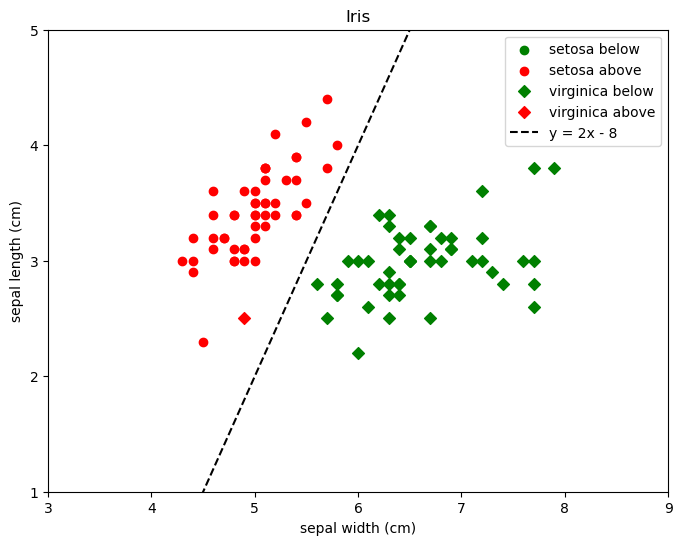

In [13]:
iris = load_iris()

data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

f = plt.figure(figsize=(8, 6))

colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

def line_function(x):
    return 2*x - 8


for i in range(len(target_names)):
    if target_names[i] == 'versicolor':
        continue
        
    x_data = data[target == i, 0]
    y_data = data[target == i, 1]

    below_line = y_data < line_function(x_data)
    above_line = y_data >= line_function(x_data)

    plt.scatter(x_data[below_line], y_data[below_line], c='g', marker=markers[i], label=f'{target_names[i]} below')
    plt.scatter(x_data[above_line], y_data[above_line], c='r', marker=markers[i], label=f'{target_names[i]} above')

    
plt.xlim(3, 9)
plt.ylim(1, 5)

plt.xticks(range(3, 10))
plt.yticks(range(1, 6))

x_values = np.linspace(3, 9, 100)
y_values = 2*x_values - 8

plt.plot(x_values, y_values, '--k', label='y = 2x - 8')
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.title("Iris")

plt.legend()
plt.savefig('assignment2-1.png')
plt.show()


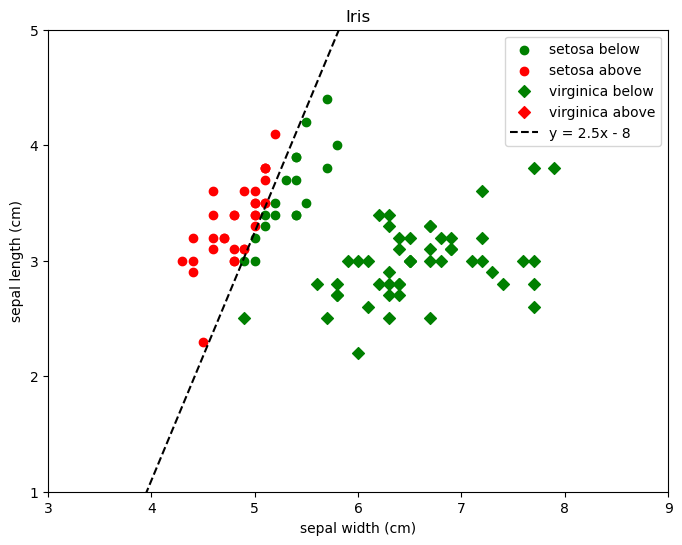

In [19]:
iris = load_iris()

data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

f = plt.figure(figsize=(8, 6))

colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

def line_function(x):
    return 2.15*x - 7.5


for i in range(len(target_names)):
    if target_names[i] == 'versicolor':
        continue
        
    x_data = data[target == i, 0]
    y_data = data[target == i, 1]

    below_line = y_data < line_function(x_data)
    above_line = y_data >= line_function(x_data)

    plt.scatter(x_data[below_line], y_data[below_line], c='g', marker=markers[i], label=f'{target_names[i]} below')
    plt.scatter(x_data[above_line], y_data[above_line], c='r', marker=markers[i], label=f'{target_names[i]} above')

    
plt.xlim(3, 9)
plt.ylim(1, 5)

plt.xticks(range(3, 10))
plt.yticks(range(1, 6))

x_values = np.linspace(3, 9, 100)
y_values = 2.15*x_values - 7.5

plt.plot(x_values, y_values, '--k', label='y = 2.5x - 8')
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.title("Iris")

plt.legend()
plt.savefig('assignment2-2.png')
plt.show()


In [16]:
def generate_point_cloud(K, d):
    center_coordinates = [(np.cos(2 * np.pi * i / K) * d, np.sin(2 * np.pi * i / K) * d) for i in range(K)]

    all_points = []

    for center in center_coordinates:
        x_values = np.random.normal(center[0], 1, 1000)
        y_values = np.random.normal(center[1], 1, 1000)
        points = np.vstack((x_values, y_values)).T
        all_points.append(points)

    all_points = np.concatenate(all_points)

    return all_points

K_values = [7, 11, 23]
d_values = [5, 10, 15]

for K in K_values:
    for d in d_values:
        points = generate_point_cloud(K, d)
        
        plt.figure(figsize=(8, 6))
        plt.scatter(points[:, 0], points[:, 1], s=5)
        plt.title(f"Point Cloud: K={K}, d={d}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig(f'point_cloud_K{K}_d{d}.png')
        plt.close()


Percentage of red points: %16.3 when d: 5


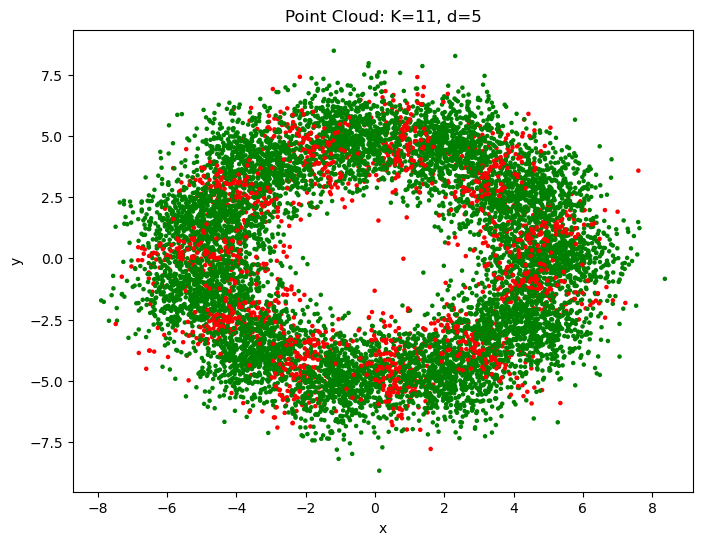

Percentage of red points: %0.55 when d: 10


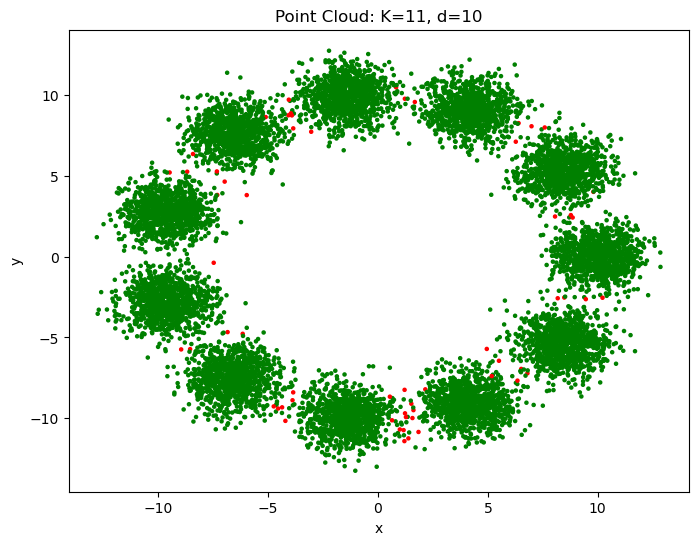

Percentage of red points: %0.0 when d: 15


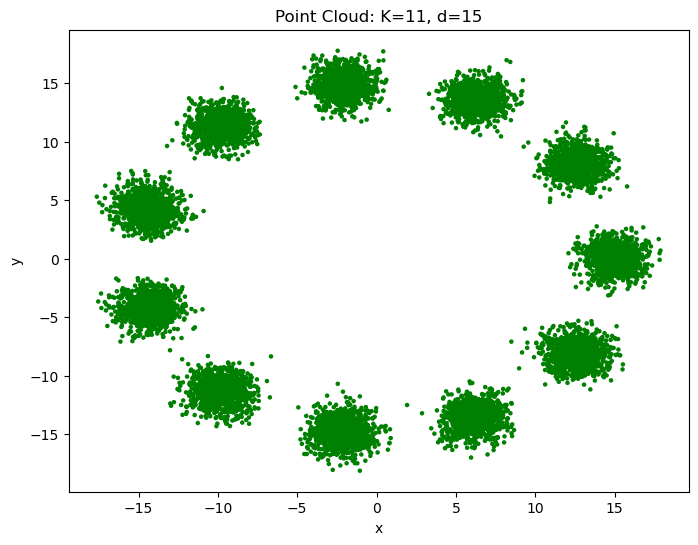

In [5]:
def generate_point_cloud(K, d):
    center_coordinates = [(np.cos(2 * np.pi * i / K) * d, np.sin(2 * np.pi * i / K) * d) for i in range(K)]

    all_points = []
    center_indices = []

    for center_index, center in enumerate(center_coordinates):
        x_values = np.random.normal(center[0], 1, 1000)
        y_values = np.random.normal(center[1], 1, 1000)
        points = np.vstack((x_values, y_values)).T
        all_points.append(points)
        center_indices.extend([center_index] * len(points))

    all_points = np.concatenate(all_points)

    return all_points, center_indices, center_coordinates

# np.linalg.norm is used to calculate euclidean distance between the points
def calculate_distance(point, center):
    return np.linalg.norm(point - center)

K = 11  
d_values = [5, 10, 15]

for d in d_values:
    points, center_indices, center_coordinates = generate_point_cloud(K, d)

    colors = []
    red_point_count = 0
    for i, point in enumerate(points):
        distances = [calculate_distance(point, center) for center in center_coordinates]
        min_distance_index = np.argmin(distances)
        if min_distance_index != center_indices[i]:  
            colors.append('r')
            red_point_count += 1
        else:
            colors.append('g') 

    print(f"Percentage of red points: %{round(red_point_count/len(points) * 100, 2)} when d: {d}")
    plt.figure(figsize=(8, 6))
    plt.scatter(points[:, 0], points[:, 1], c=colors, s=5)
    plt.title(f"Point Cloud: K={K}, d={d}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [3]:
# Euclidean distance between two sets 
def distance_matrix(X, Y):
    sum_X = np.sum(X**2, axis=1)
    
    sum_Y = np.sum(Y**2, axis=1)
    
    inner_product = np.dot(X, Y.T)
    
    D = np.sqrt(np.add.outer(sum_X, sum_Y) - 2 * inner_product)
    
    return D

def generate_random_matrices(d, N, M):
    X = np.random.rand(N, d)
    Y = np.random.rand(M, d)
    return X, Y

def measure_time(d, N, M):
    X, Y = generate_random_matrices(d, N, M)
    
    start_time = time.time()
    distance_matrix(X, Y)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    return elapsed_time

d1, N1, M1 = 100, 1000, 1000
d2, N2, M2 = 100, 10000, 1000

elapsed_time1 = measure_time(d1, N1, M1)
elapsed_time2 = measure_time(d2, N2, M2)

print(f"Elapsed time for d = {d1}, N = {N1}, M = {M1}: {elapsed_time1} seconds")
print(f"Elapsed time for d = {d2}, N = {N2}, M = {M2}: {elapsed_time2} seconds")


Elapsed time for d = 100, N = 1000, M = 1000: 0.07605123519897461 seconds
Elapsed time for d = 100, N = 10000, M = 1000: 0.2301499843597412 seconds


In [8]:
def nearest_neighbor(X, Y):
    D = distance_matrix(X, Y)
    return np.argmin(D, axis=1)

def k_nearest_neighbors(X, Y, k):
    D = distance_matrix(X, Y)
    return np.argsort(D, axis=1)[:, :k]

def generate_random_matrices(d, N, M):
    X = np.random.rand(N, d)
    Y = np.random.rand(M, d)
    return X, Y

def measure_time(d, N, M, k):
    X, Y = generate_random_matrices(d, N, M)
    
    start_time = time.time()
    nn = nearest_neighbor(X, Y)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    print(f"Nearest Neighbor when k = 1: {nn}")
    print("\n")
    print(f"Elapsed time for finding nearest neighbors with k=1 for d = {d}, N = {N}, M = {M}: {elapsed_time} seconds")
    
    print("\n\n")
    start_time = time.time()
    nn_k = k_nearest_neighbors(X, Y, k)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    print(f"K-Nearest Neighbor when k = {k}: {nn_k}")
    print("\n")
    print(f"Elapsed time for finding {k} nearest neighbors for d = {d}, N = {N}, M = {M}: {elapsed_time} seconds")

d = 100
N = 1000
M = 1000
k = 5

measure_time(d, N, M, k)

Nearest Neighbor when k = 1: [971 449 139 340 286 457 893 379 743 687 457 800 163 248 734 998 983 632
  55 341 178 383 223 224 965 913 559 246 281 796 449 615 350 910 184 550
 183 737 806 580 285 473 133 365 959 117 601 680 617  19 182 685  44 971
  14 809 141 230 453 285 249 508 965 904  89 659 553 912 184 396  77 114
 654 669 621 881 416 761 901 714 626 597 980  97 799 678 720 680  81 685
  19 575 245 857 170 249 552 796 338 614  95 525 921  63 456  19 123 860
 652 821 191 680   7  67 548  27   1  26 685 645 224 854 982 955 134 386
 807 421 133 314 117 529 412 441 244 978  44 670 754 556 761 761  26 198
 128 572 941 340 297 245 460 338 944 422 245 285 851  11 795 564 856 245
 564 833  37 452 169 996 504  47 659 670 587 285 731 652 805 810 762 302
 529 340 220 303 700  32 579 978  35 114 787  26 184 194 743 959  77 109
 155 577 553 829 553 357  74   4 200 508 738   9 734 327 732   7 504 927
 189 709 975  72 559 762 183 386 232 314 718 434  80 974 316  41 285 194
 191  62 698 518 714  